# Titanic Data Analysis

## Given:

<b>Background Information:</b>
(source: <i>https://www.kaggle.com/c/titanic</i>)

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.




<b>Data Description </b>(source: <i>https://www.kaggle.com/c/titanic</i>)<br/>
The data contains demographics and passenger information from <u>891</u> of the 2224 passengers and crew on board the Titanic. 
<ul>
<li>survival : Survival (0 = No; 1 = Yes)</li>
<li>pclass   : Passenger ticket class (1 = 1st; 2 = 2nd; 3 = 3rd))</li>
<li>name     : Name</li>
<li>sex      : Sex</li>
<li>age      : Age in years</li>
<li>sibsp    : # of siblings / spouses aboard the Titanic</li>
<li>parch    : # of parents / children aboard the Titanic</li>
<li>ticket   : Ticket Number</li>
<li>fare     : Passenger Fare</li>
<li>cabin    : Cabin number</li>
<li>embarked : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton))</li>
</ul>

<i>Special Notes:</i>
<ul>
<li>Pclass is a proxy for socio-economic status (SES) 1st is Upper, 2nd is Middle and 3rd is Lower</li>
<li>Age is in Years; fractional if the age is less than one. If the age is estimated, it is in the form xx.5</li>
<li>With respect to the family relation variables (sibsp and parch) some relations were ignored.</li> 
</ul>

The following are the definitions used for sibsp:
<ul>
<li>Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic</li>
<li>Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)</li>
</ul>
The following are the definitions used for parch:
<ul>
<li>Parent: Mother or Father of Passenger Aboard Titanic</li>
<li>Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic</li>
</ul>

Some children travelled only with a nanny, therefore parch=0 for them.

<b> What is excluded or not considered?</b>
<body>Data excludes relations like in-laws, aunts/uncles, cousins, nephews/nieces, friends, neighbors
</body>

## <b> Aim: Analyze the titanic data set from Kaggle and report observations </b>


<b>Questions:</b>
<ol type="1">
<li>Did gender determine chances of survival?</li>
<li>Was social-economic status a factor for survival?</li>



Importing libraries to help the data analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the data to be explored

In [4]:
filename = 'titanicData.csv'
explore_data = pd.read_csv(filename)


## <b>Step 1: </b> Lets explore the data

Lets see what data types do we have in our data

In [5]:
explore_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We have numerical as well as categorical types of variables in our data:
<ul>
<li><b>Numerical:</b> Age, SibSp, Parch, Fare </li>
<li><b>Categorical:</b> Pclass, Sex and Embarked </li>
</ul>

Observe first five rows in the data

In [6]:
explore_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b>Obs:</b> Some of the cabin data has missing values; Some of the Name column data includes additional information

Observe last five rows in the data

In [7]:
explore_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<b>Obs:</b> Age and Cabin columns have missing values; Cabin and Ticket columns have alphanumeric values

lets take a high level look of the data


In [8]:
explore_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<b>Obs:</b>
<ul>
<li>It looks weird that the minimum is Age column is less than one. The data description mentions that age is fractional if its less than one, so there must be one or more babies (age less than one) on board the ship</li>
<li>Age column has 714 rows compared to 891 in other columns</li>
<li>75% of the passengers with age listed were under the age of 38, and the mean age overall was 29.7.
</li>
<li>38.3% of the passengers survived</li>
<li>More than 50% of the passengers belong to Pclass 3 </li>
<li>The minimum fare is 0, so it seems to indicate that there were some free tickets or maybe there was some error in the data. 512 seems too high a fare, it could be a possible outlier or another error.</li>
</ul>

<b>Additional Questions:</b> 
<ul>
<li>What are the charecteristics of the missing age values? Will it be ok to drop them</li>
<li>How many babies (less than one years old) are on the ship according to this dataset? How many of them survived?</li>

</ul>



'.describe' gives information on columns containings quantitative data, 
so using include = 'all' to see information regarding other columns

In [9]:
explore_data[['Cabin','Ticket','Embarked']].describe(include = 'all')

,Cabin,Ticket,Embarked
count,204,891,889
unique,147,681,3
top,C23 C25 C27,CA. 2343,S
freq,4,7,644


<b>Obs:</b> There are only 204 rows in the Cabin column and 2 data points seem to be missing in the embarked column as well

## <b> Step 2: </b> Cleaning and organizing the data

Check for duplicate entries
since PassengerId should be unique to a passenger
we should use that to check for duplicate values

In [10]:
dups = explore_data['PassengerId'].duplicated().sum()
print "The number of duplicated entries are {}".format(dups)

The number of duplicated entries are 0


Check for missing values.We already know from the describe function that Cabin, Age and Survived columns
have missing values. We can ignore Cabin as the data in that column does not seem significant
to our analysis. We can drop that column but we will need to fix missing values for Age and Embarked column


In [11]:
explore_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

To fill the missing values we can either add median or mean.
Median would make more sense as mean can be influenced by any outliers.
Let us print the mean, median and then observe the distribution of 'Age' data.


Age mean: 29.36
Age median: 28.0


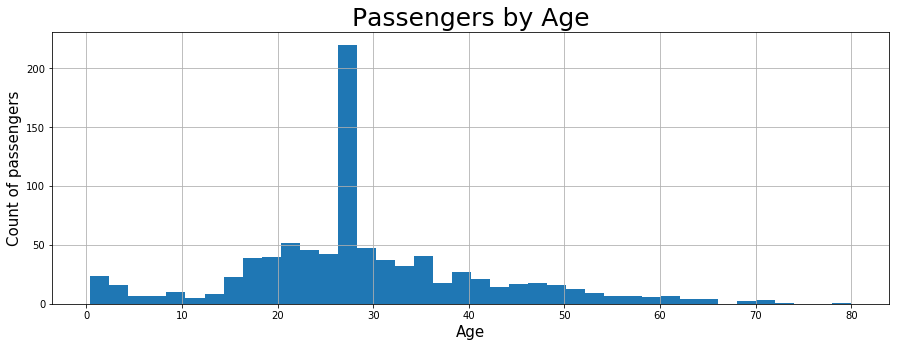

In [62]:
print 'Age mean:', round(explore_data.Age.mean(),2)
print 'Age median:',explore_data.Age.median()

fig =plt.figure()
explore_data.hist(column = 'Age', bins= 40,figsize=(15,5))
plt.xlabel('Age',fontsize = 15)
plt.ylabel('Count of passengers', fontsize = 15)
plt.title('Passengers by Age', fontsize = 25)


 Age mean > Age median and the data is skewed towards the right.
 Let's replace  the missing values with median


In [46]:
fd = explore_data # creating a seperate copy
fd["Age"] = fd["Age"].fillna(fd["Age"].median())
fd["Age"].isnull().sum() #missing Age values have been fixed


0

Now lets look at embarked columm

In [47]:
print fd.Embarked.value_counts() 
fd.Embarked.unique()
#It looks like most of the people embarked at 'S', S counts >> C counts and S counta >>> Q counts.
#Assigned 'S' to the missing numbers is unlikely to make a big difference to the whole data
fill = fd.Embarked.value_counts().argmax()
fd['Embarked'] = fd['Embarked'].fillna(fill)
fd['Embarked'].isnull().sum() #missing Embarked values fixed


S    644
C    168
Q     77
Name: Embarked, dtype: int64


0

To make Embarked column more readable we can change port values to original names


In [48]:
def get_port_name(port_name):
    if port_name == "S":
        return "Southampton"
    elif port_name == "C":
        return "Cherbourg"
    elif port_name == "Q":
        return "Queenstown"
    else:
        return port_name     

fd["Embarked"] = fd["Embarked"].apply(get_port_name)
fd["Embarked"].value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

Renaming Pclass to make it more readable


In [49]:
fd.loc[fd["Pclass"] == 1, "Pclass"] = "Upper"
fd.loc[fd["Pclass"] == 2, "Pclass"] = "Middle"
fd.loc[fd["Pclass"] == 3, "Pclass"] = "Lower"
fd.Pclass.unique()

array(['Lower', 'Upper', 'Middle'], dtype=object)

Renaming Survived column data to make it more readable


In [50]:
fd.loc[fd["Survived"] == 1, "Survived"] = "Yes"
fd.loc[fd["Survived"] == 0, "Survived"] = "No"
fd.Survived.unique()

array(['No', 'Yes'], dtype=object)

## <b>Step 3:</b> Exploring data

Functions to get passenger data and survivor data correseponding to a specific colum

In [51]:
def get_passengers(col):
    passengers =  fd[col].value_counts()
    return passengers

def get_alive(col):
    alive = fd[fd.Survived == 'Yes'].groupby(col).count()['Survived']
    return alive


<b> Q. At which port did maximum of the passengers get in? </b>

Use get_passengers function to observe passengers data by port

Most of the passengers got in at Southampton


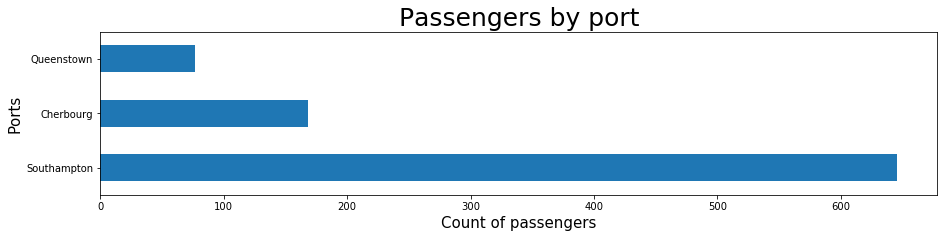

In [61]:
p_port = get_passengers('Embarked')
fig =plt.figure()
p_port.plot(kind = 'barh', figsize =(15,3))
plt.xlabel('Count of passengers',  fontsize = 15)
plt.ylabel('Ports', fontsize = 15)
plt.title('Passengers by port', fontsize = 25)

print "Most of the passengers got in at {}".format(p_port.argmax())
# simple google search tells us that that the Titanic started from Southampton, England; 
# then went to Cherbourg and the last stop was Queenstown, Ireland before setting off for USA
# Most of the passengers got in at the first stop - Southampton.

From the plot it is clear that most of the passengers were from Southampton (above 600) followed by Cherbourg (above 100) and lastly Queenstown (below 100)

<b> Q. What is the distribution of passengers by class? </b>

Use get_passengers function to get passengers data by class

Lower     491
Upper     216
Middle    184
Name: Pclass, dtype: int64 

Most of the passengers belong to Lower class
Lower class passengers' count is more than the other two combined and
there are more Upper class passengers than middle class passengers 



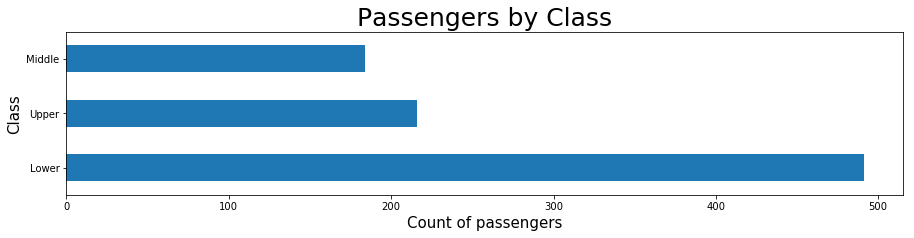

In [65]:
p_class = get_passengers('Pclass')
print p_class, '\n'

print "Most of the passengers belong to {} class".format(p_class.argmax())

comp = p_class.Lower > p_class.Middle + p_class.Upper

if comp:
    print "Lower class passengers' count is more than the other two combined and"
if p_class.Middle < p_class.Upper:
    print "there are more Upper class passengers than middle class passengers \n"

fig = plt.figure()
p_class.plot(kind = 'barh', figsize =(15,3), title = 'Passengers by class')
plt.xlabel('Count of passengers',  fontsize = 15)
plt.ylabel('Class', fontsize = 15)
plt.title('Passengers by Class', fontsize = 25)


From the plot and calculations it is clear that most of the passengers belong to lower class(491), followed by upper class(216) and lastly middle class(184).

<ul>
<b> 
<li>Q. How much did passengers spend on fare? </li>
<li>Q. Did passengers getting in at Queenstown pay less than those getting in at Southampton?</li>
<li>Q. What was the fare distribution across the economic classes?</li>
</b>
</ul>

Use 'describe' method and then plot it to observe charecteristics of 'Fare' colum 

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


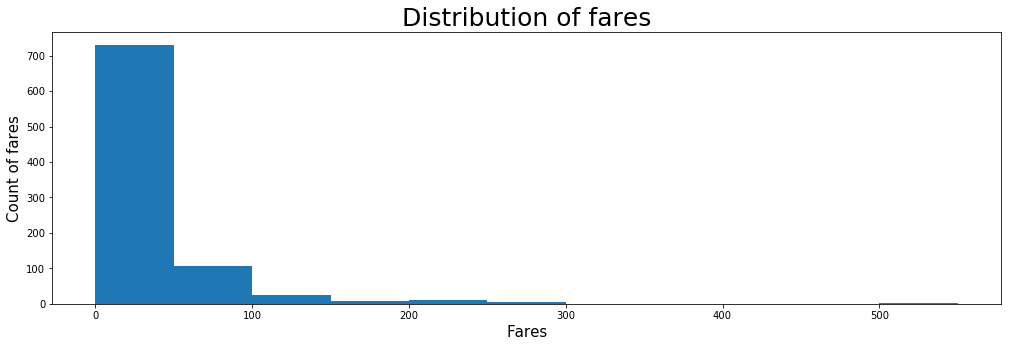

In [69]:
print fd['Fare'].describe()

fig = plt.figure()
fd['Fare'].plot(kind = 'hist', bins = range(0,600,50), figsize=(17,5))
plt.xlabel('Fares',  fontsize = 15)
plt.ylabel('Count of fares', fontsize = 15)
plt.title('Distribution of fares', fontsize = 25)


From the plot, we can safely say that most of the fares are below 100, rather between 0 to 50.

Further divide ticket into smaller ranges

In [19]:
print "Fares range 0 to 512"
# most of the fares are 100 or below
print fd['Fare'][fd['Fare']<=100].count(), " i.e. majority of the tickets costed 100 or below"
print fd['Fare'][fd['Fare']>100].count(), " tickets were priced above 100"
print fd['Fare'][fd['Fare']>300].count()," tickets costed more than 300, could be a typo"
print fd['Fare'][fd['Fare']==0].count()," tickets cost 0, seems weird, but possible if the tickets were won in raffle or something similar"

Fares range 0 to 512
838  i.e. majority of the tickets costed 100 or below
53  tickets were priced above 100
3  tickets costed more than 300, could be a typo
15  tickets cost 0, seems weird, but possible if the tickets were won in raffle or something similar


Observe the fare range for lower class

count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64

 Fares in lower class range between 0 and 69.55 and most of them are between 0 and 10


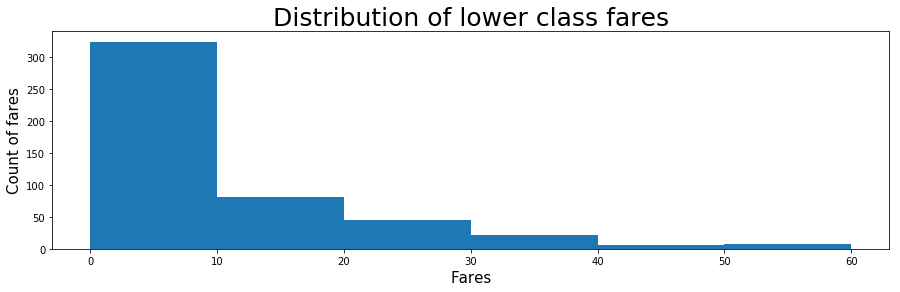

In [70]:
f_lower = fd[fd.Pclass == 'Lower']
print f_lower.Fare.describe()

fig = plt.figure()
f_lower['Fare'].plot(kind = 'hist', figsize = (15,4), bins=range(0, 70, 10),  title = 'Lower class fares')
plt.xlabel('Fares',  fontsize = 15)
plt.ylabel('Count of fares', fontsize = 15)
plt.title('Distribution of lower class fares', fontsize = 25)


print "\n Fares in lower class range between 0 and 69.55 and most of them are between 0 and 10"


# fig, ax = plt.subplots(1,3)
# f_lower['Fare'].plot(kind = 'hist', figsize = (20,4), ax = ax[0], title = 'Lower class fares')
# f_middle['Fare'].plot(kind = 'hist', figsize = (20,4), ax = ax[1], title = 'Middle class fares')
# f_upper['Fare'].plot(kind = 'hist', figsize = (20,4), ax = ax[2], title = 'Upper class fares')


From the plot for fares of lower class we can see that majority of the tickets are below 40 and a maximum of those lie between 0 to 10.

Observe the fare range for middle class

count    184.000000
mean      20.662183
std       13.417399
min        0.000000
25%       13.000000
50%       14.250000
75%       26.000000
max       73.500000
Name: Fare, dtype: float64
 Fares in middle class lie between 0 and 73.5 and majority of them lie between 10 and 20


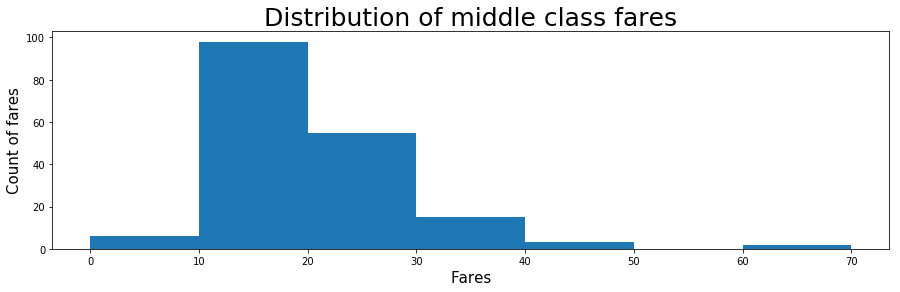

In [71]:
f_middle = fd[fd.Pclass == 'Middle']
print f_middle.Fare.describe()
print " Fares in middle class lie between 0 and 73.5 and majority of them lie between 10 and 20"

fig = plt.figure()
f_middle['Fare'].plot(kind = 'hist', figsize = (15,4), bins=range(0, 80, 10),title = 'Middle class fares')
plt.xlabel('Fares',  fontsize = 15)
plt.ylabel('Count of fares', fontsize = 15)
plt.title('Distribution of middle class fares', fontsize = 25)


From the plot, we can see that most of the tickets lie between the fare range 10 to 20.

Observe the fare range for Upper class

count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64
Majority of the upper class fares surprisingly lie between 20 and 40, I expected them to be much higher


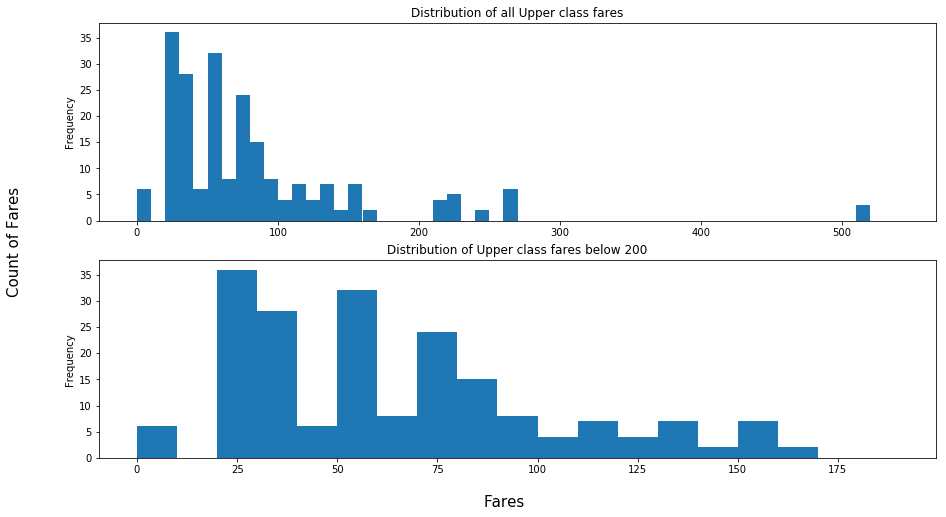

In [101]:
f_upper = fd[fd.Pclass == 'Upper']
print f_upper.Fare.describe()
print "Majority of the upper class fares surprisingly lie between 20 and 40, I expected them to be much higher"
fig, ax = plt.subplots(2,1)
f_upper['Fare'].plot(kind = 'hist', figsize = (15,8), bins=range(0, 550, 10),  title = 'Distribution of all Upper class fares', ax= ax[0])
f_upper['Fare'].plot(kind = 'hist', figsize = (15,8), bins=range(0, 200, 10),  title = 'Distribution of Upper class fares below 200', ax = ax[1])
fig.text(0.5,0.04,'Fares', ha='center',fontsize = 15)
fig.text(0.04,0.5,'Count of Fares', va='center',fontsize = 15,rotation = 'vertical')


First plot looks at the ticket fares across the entire range and we can clearly see that most of tickets for upper class are priced below 200. From the second plot it can be inferred that majority of the tickets are in the fare range 20 to 40.

Observe fares paid by passengers across economic classes at different ports

In [102]:
print fd.groupby(["Pclass", "Embarked"]).mean()['Fare']

print "\nFares seem to be all over the place with no logic whatsoever (assuming furthest port should charge maximum)"
print "The question was - do passengers getting in at Queenstown pay lower than Southampton passengers?"
print "Yes, lower and middle class passengers from Queenstown do pay less than Southampton passengers for the same class"
print "The same is not true for Upper class, it may because of the outliers. Lets check: \n"
print f_upper[f_upper.Fare > 300][['Embarked','Fare']]
print "All the outliers are from Cherbourg, so its not because of outliers and the fares really are weird"

Pclass  Embarked   
Lower   Cherbourg       11.214083
        Queenstown      11.183393
        Southampton     14.644083
Middle  Cherbourg       25.358335
        Queenstown      12.350000
        Southampton     20.327439
Upper   Cherbourg      104.718529
        Queenstown      90.000000
        Southampton     70.514244
Name: Fare, dtype: float64

Fares seem to be all over the place with no logic whatsoever (assuming furthest port should charge maximum)
The question was - do passengers getting in at Queenstown pay lower than Southampton passengers?
Yes, lower and middle class passengers from Queenstown do pay less than Southampton passengers for the same class
The same is not true for Upper class, it may because of the outliers. Lets check: 

      Embarked      Fare
258  Cherbourg  512.3292
679  Cherbourg  512.3292
737  Cherbourg  512.3292
All the outliers are from Cherbourg, so its not because of outliers and the fares really are weird


<b> Q. What was the gender ratio on the ship? What was the gender distribution by class? How many of each gender survived? <b>

Division and Round function to see what % of population survived


In [103]:
def per_survivors(survivors, total):
    return 100*round(survivors/total,2)

Find gender ratio, division of gender across economic classes and finally survivors by gender 


The female to male gender ratio on the ship is 0.54 

Pclass  Sex   
Lower   female    144
        male      347
Middle  female     76
        male      108
Upper   female     94
        male      122
Name: PassengerId, dtype: int64
Upper class has relatively more females to males than the other classes 

Total Survivors were: 342 or 38.0% total passengers
Male survivors: 109 or 19.0% males
Female survivors: 233 or 74.0% females 



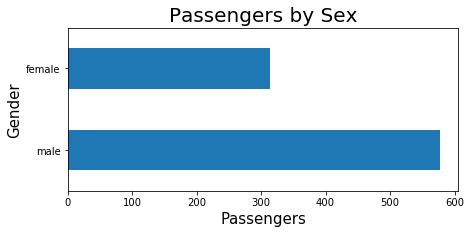

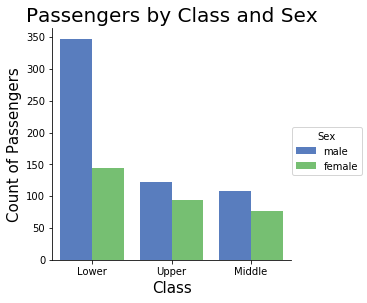

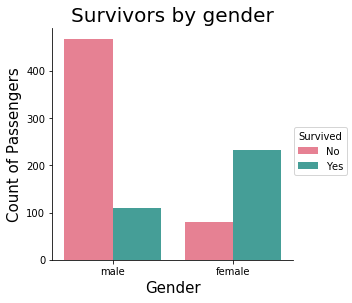

In [124]:
from __future__ import division

g_sex = get_passengers('Sex') 
ts = get_alive('Sex')

gender_ratio =  round(( g_sex.female/g_sex.male ),2)
#There were a lot more men than women on board
print '\n','The female to male gender ratio on the ship is {}'.format(gender_ratio), '\n'
print fd.groupby(["Pclass","Sex"]).count()['PassengerId']
print "Upper class has relatively more females to males than the other classes \n"

total_passengers = fd.Sex.count()
total_survivors = fd.Sex[fd.Survived == "Yes"].count()


per_ts = per_survivors(total_survivors,total_passengers)
per_m  = per_survivors(ts.male,g_sex.male)
per_f  = per_survivors(ts.female,g_sex.female)

print 'Total Survivors were: {} or {}% total passengers'.format(total_survivors, per_ts)
print 'Male survivors: {} or {}% males'.format(ts.male,per_m )
print 'Female survivors: {} or {}% females \n'.format(ts.female, per_f)    


# sns.factorplot(x = "Sex", hue = "Sex", data=fd, kind = 'count', palette = "muted")
# plt.title("Passengers by gender")
fig = plt.figure()
g_sex.plot(kind = 'barh', figsize =(7,3))
plt.xlabel('Passengers',  fontsize = 15)
plt.ylabel('Gender', fontsize = 15)
plt.title('Passengers by Sex', fontsize = 20)

sns.factorplot(x = "Pclass", hue = "Sex", data=fd, kind = 'count', palette = "muted")
plt.xlabel('Class',  fontsize = 15)
plt.ylabel('Count of Passengers', fontsize = 15)
plt.title("Passengers by Class and Sex", fontsize = 20)

sns.factorplot(x = "Sex", hue = "Survived", data=fd, kind = 'count',palette = "husl")
plt.title("Survivors by gender",fontsize = 20)
plt.xlabel('Gender',  fontsize = 15)
plt.ylabel('Count of Passengers', fontsize = 15)


Plot 1 shows that there were many more males than females. Plot 2 plots genders by class. Plot 3 shows that more females survived compared to males.

It is interesting to note that although there were more males than females on board, 
ultimately more females (larger %) survived the disaster compared to males. 

<b> Q. Of the survivors, how many were children (age 19 or younger)? </b>

In [26]:
from __future__ import division

teen   = fd.Age[fd.Age <= 19].count()
s_teen  = fd.Age[fd.Age <= 19][fd.Survived == "Yes"].count()
per_teen = round((100*s_teen/teen),2)

print "There are {} children on board Titanic".format(teen)
print "{}({}%) children surved the shipwreck".format(s_teen, per_teen) 

There are 164 children on board Titanic
79(48.17%) children surved the shipwreck


<b>Q. How many babies (age below 1) were there on the board and how many of them survived?

In [27]:
bob   = fd.Age[fd.Age < 1].count()
bob2  = fd.Age[fd.Age < 1][fd.Survived == "Yes"].count()

print "There are {} babies on board Titanic".format(bob)
print "{} babies surved the shipwreck".format(bob2) #looks like all of the babies survived

There are 7 babies on board Titanic
7 babies surved the shipwreck


<b> Q. Did class play a factor in deciding survival? </b>

Find survivors by class using get_passengers and get_alive functions and plot survivors by class

Total by class 
Lower     491
Upper     216
Middle    184
Name: Pclass, dtype: int64 

Survivors by class 
Pclass
Lower     119
Middle     87
Upper     136
Name: Survived, dtype: int64


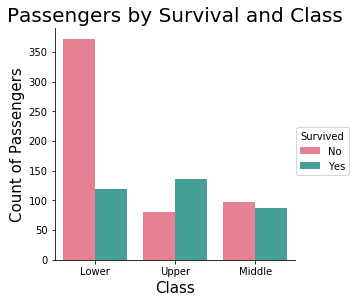

In [126]:
g_class = get_passengers('Pclass')
s_class = get_alive('Pclass')

print 'Total by class','\n', g_class, '\n'
print 'Survivors by class','\n', s_class


'''
fig, ax = plt.subplots(1,2)
group_by_class.plot(kind = 'bar', title = "passengers_by_class", ax = ax[0])
survivors_by_class.plot(kind = 'bar', title = "survivors_by_class", ax= ax[1], color = 'teal')
fig.show()
'''
fig = plt.figure()
sns.factorplot(x = "Pclass", hue = "Survived", data=fd, kind = 'count', palette = "husl")
plt.xlabel('Class',  fontsize = 15)
plt.ylabel('Count of Passengers', fontsize = 15)
plt.title('Passengers by Survival and Class', fontsize = 20)



Plot 3 shows survivors vs dead across classes. More people died in lower class than any other class and relatively more upper class people survived compared to all other classes.

From the graph we can deduce that a higher percentage of Upper class followed by Middle class survived the disaster. Most passenger lives lost were from Lower class.

Check if there is a relation between gender, class and survival by plotting a graph of survivors by economic classes

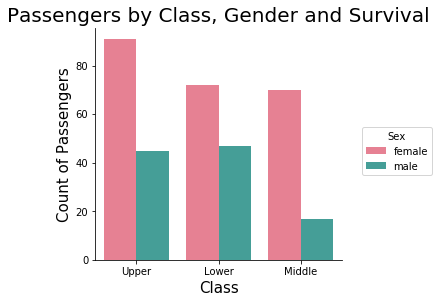

In [127]:
sur = fd[fd.Survived == "Yes"] 
fig = plt.figure()
sns.factorplot(x = "Pclass", hue = "Sex", data=sur, kind = 'count', palette = "husl")
plt.xlabel('Class',  fontsize = 15)
plt.ylabel('Count of Passengers', fontsize = 15)
plt.title('Passengers by Class, Gender and Survival', fontsize = 20)


The above plot checks survivors by gender across classes. It makes it abundantly clear that more females survived than males across all the classes

From the graph, it is pretty clear that there is a higher chance of survival if you were a female irrespective of the class.

# Observations

-  75% of the passengers with age listed were under the age of 38, and the mean age overall was 29.7
-  Most of the passengers got in at Southampton. Majority of the tickets costed 100 or below. 
-  Most of the passengers belonged to Lower class. Lower class passengers' count is more than the other two combined and there      are more Upper class passengers than middle class passengers.
-  38.3% of the passengers survived. A higher percentage of Upper class followed by Middle class survived the disaster. Most        passenger lives lost were from Lower class. Although there were more males than females on board, ultimately more females        (larger %) survived the disaster compared to males.


# Limitations

1. The data contains information on only 891 of the 2224 passengers. There is a possibility that this sample set is not an accurate representative of the population and therefore may result in biases based on the sample set like :
    - according to this dataset most of the passengers got in at Southhampton
    - most of the passengers were from lower class
    - relatively more upper class passengers survived than any other classes
2. There is no information as to how the tickets were sold and it seems weird that there is an overlap between the fare ranges paid by the lower class and the upper class. If we knew how the tickets are sold then we might be able to make better sense of the data.

# Conclusion

Based on the observations, it seems like there was a greater chance of survivng the Titanic disaster if the passenger belonged to higher class. If the passenger were a female, then there was a higher chance of survival irrespective of the class.